In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/Watera.csv")

In [4]:
df.head()

,ph,hardness,tds,chlorine,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,7.14,440.98,614.26,2.12,208.39,350.92,7.22,17.32,2.23,0
1,6.41,242.82,387.89,3.93,313.10,153.36,9.92,20.69,2.07,0
2,6.29,133.09,225.55,1.46,332.04,1420.43,8.76,32.87,5.05,0
3,7.39,71.89,459.23,0.56,609.63,24142.89,9.62,42.80,2.26,0
4,6.31,273.01,308.99,0.64,52.59,196.85,1.05,133.38,5.30,0


In [5]:
"'Since the values are binary (0 and 1), these columns are categorical in nature; therefore, they are not suitable for demonstrating missing value handling techniques.'"
df.drop(columns=["potability"],inplace=True)

In [6]:
df.isnull().sum()

,0
ph,3121
hardness,0
tds,2384
chlorine,0
sulfate,813
conductivity,1598
organic_carbon,0
trihalomethanes,0
turbidity,0


In [7]:
# Missing values were addressed on Day 1 during data collection itself.
df["ph"]=df["ph"].fillna(round(df["ph"].mean(),2))
df["tds"]=df["tds"].fillna(df["tds"].median())
df["sulfate"]=df["sulfate"].fillna(df["sulfate"].median())
df["conductivity"]=df["conductivity"].fillna(df["conductivity"].median())

## Dectecting Outliers

<Axes: xlabel='tds'>

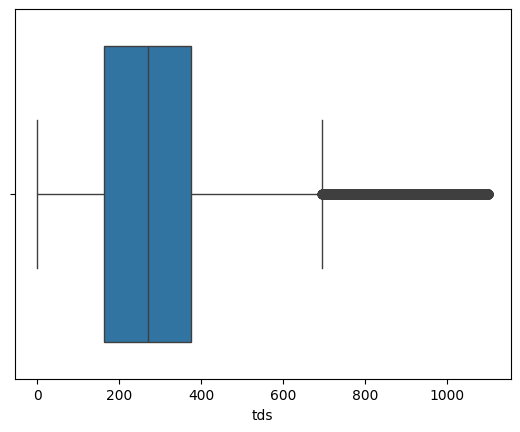

In [8]:
sns.boxplot(data=df,x=df["tds"])

In [9]:
q1=df['tds'].quantile(0.25)
q3=df['tds'].quantile(0.75)
IQR=q3-q1
median=df['tds'].median()
print(f'quantile1: {q1} ,quantile3: {q3} ,IQR: {IQR} ,median: {median}')

quantile1: 163.1975 ,quantile3: 375.82 ,IQR: 212.6225 ,median: 270.155


In [10]:
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR
print(f'lower_fence: {lower_fence} ,upper_fence: {upper_fence}')

lower_fence: -155.73625000000004 ,upper_fence: 694.7537500000001


In [11]:
a=df[(df['tds']<lower_fence) | (df['tds']>upper_fence)]

In [12]:
len(a) # size of outliers

11371

In [13]:
(len(a)/len(df))*100 # percatage of oultier in data

11.371

## Capping

In [14]:
df['tds']=np.where(df['tds']>upper_fence,upper_fence,df['tds'])

<Axes: ylabel='tds'>

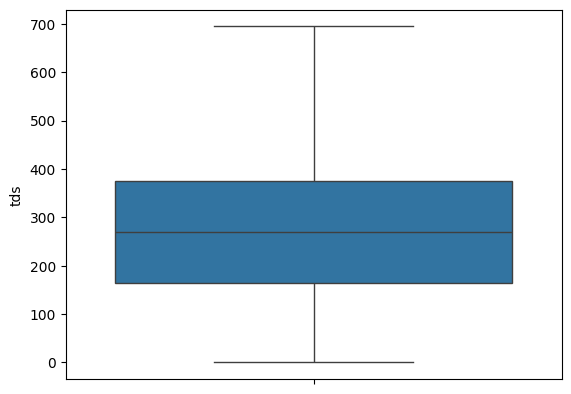

In [15]:
sns.boxplot(data=df,y=df["tds"])

## Winsorization

In [16]:
pip install feature_engine

In [17]:
from feature_engine.outliers import Winsorizer

winsor = Winsorizer(capping_method='iqr', tail='both', fold=1.5)

df['hardness'] = winsor.fit_transform(df[['hardness']])

<Axes: ylabel='hardness'>

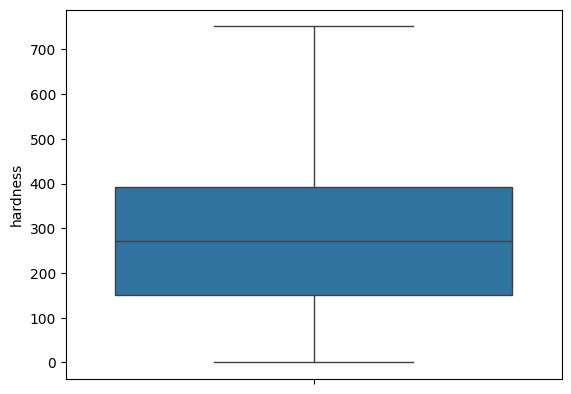

In [18]:
sns.boxplot(data=df,y=df["hardness"])

## Handling outlier
- `Capping:` We first calculate the lower limit and upper limit (using methods like IQR or percentiles). Any values outside these limits are replaced with the respective boundary values.

- `Winsorization:` The lower and upper limits are automatically determined (typically using percentile thresholds), and the method directly replaces outliers without manually specifying the limits.

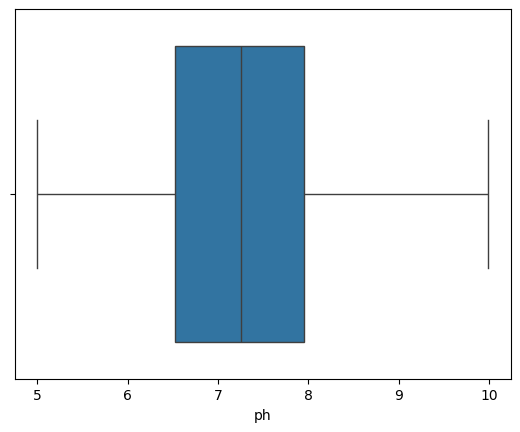

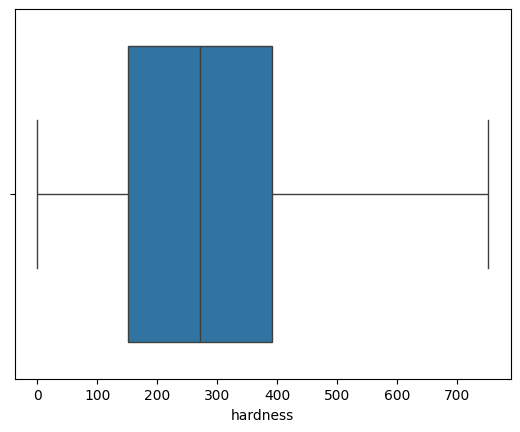

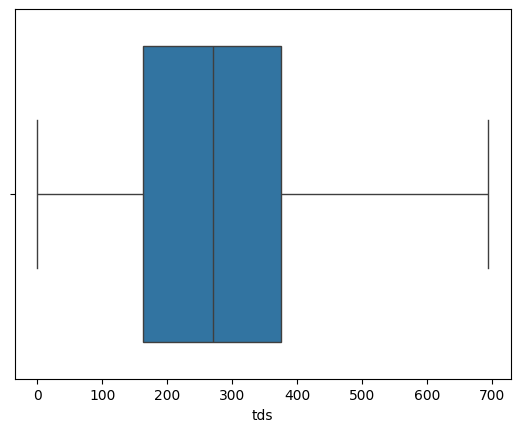

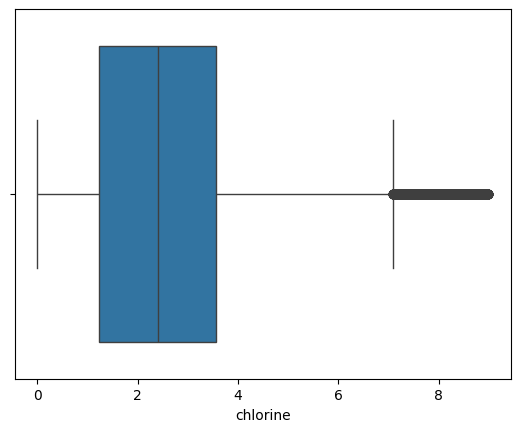

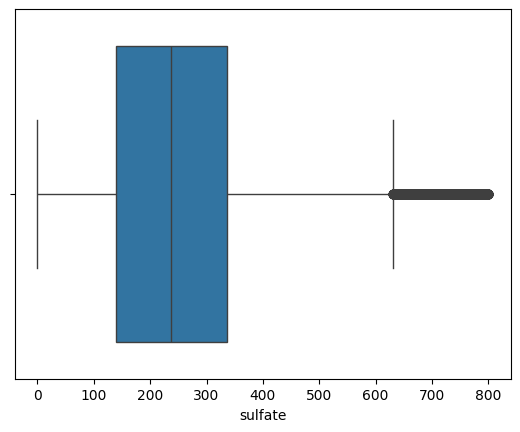

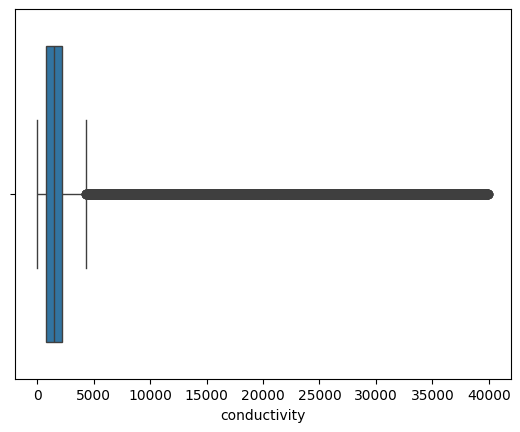

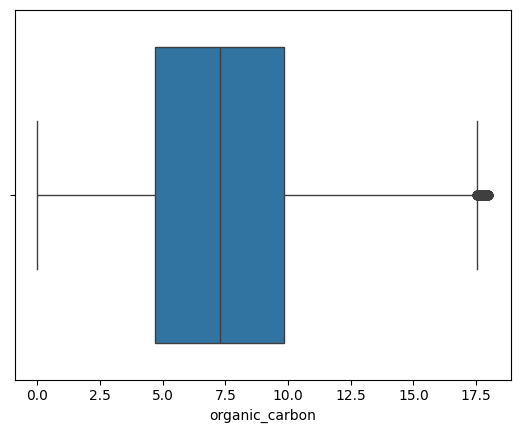

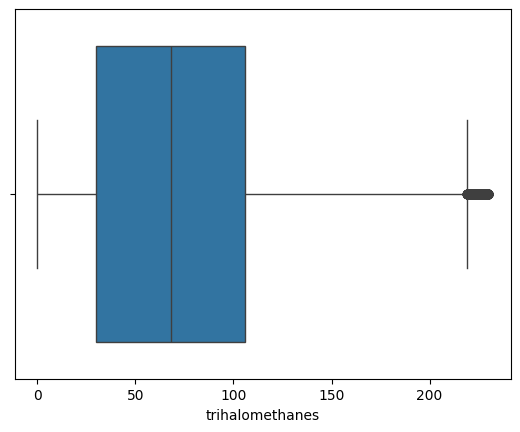

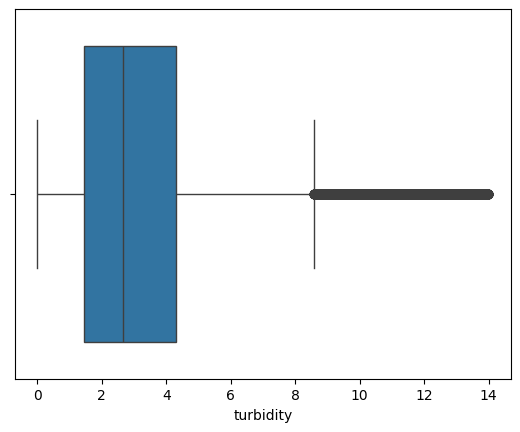

In [19]:
for i in df.columns:
  sns.boxplot(data=df,x=df[i])
  plt.show()

Compared to `capping`, `winsorization` was chosen because it is simpler to apply and efficiently handles multiple outliers across the dataset without manually defining limits.

In [20]:
for i in df.columns:
  df[i] = winsor.fit_transform(df[[i]])

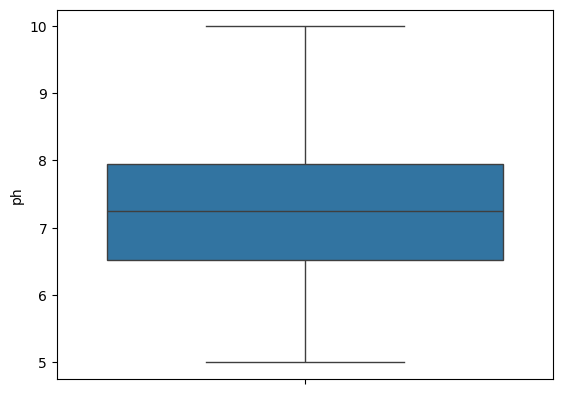

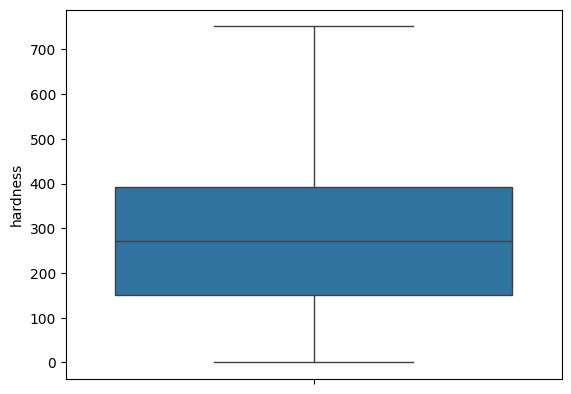

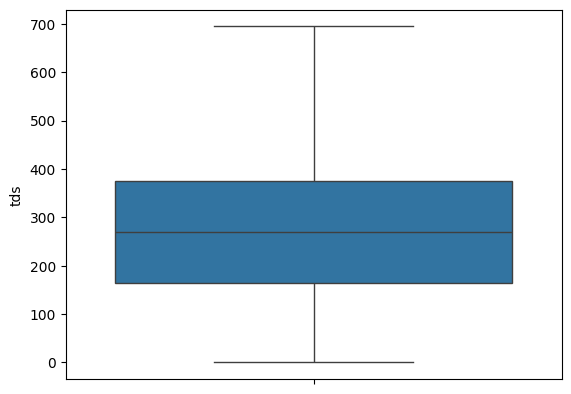

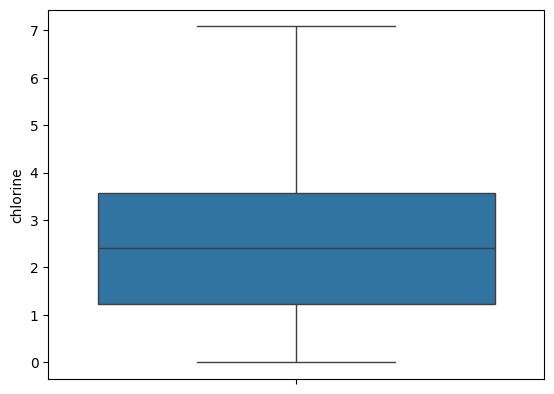

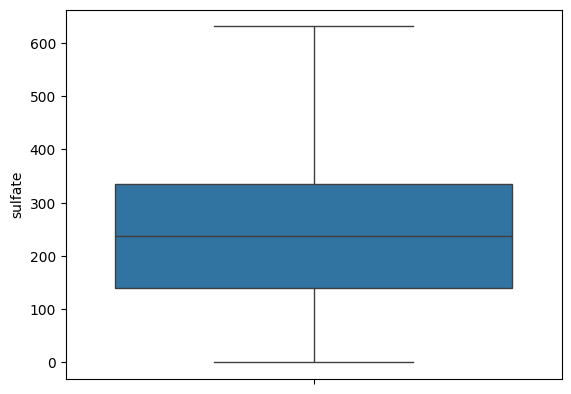

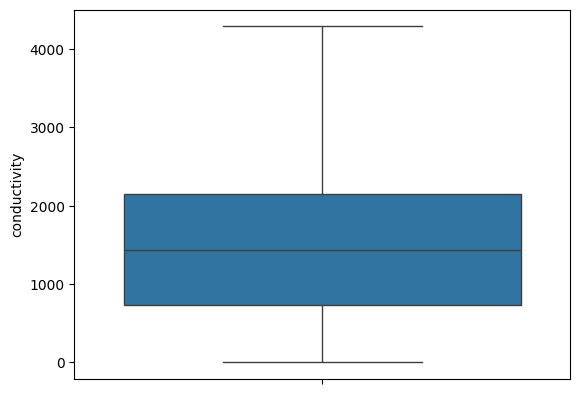

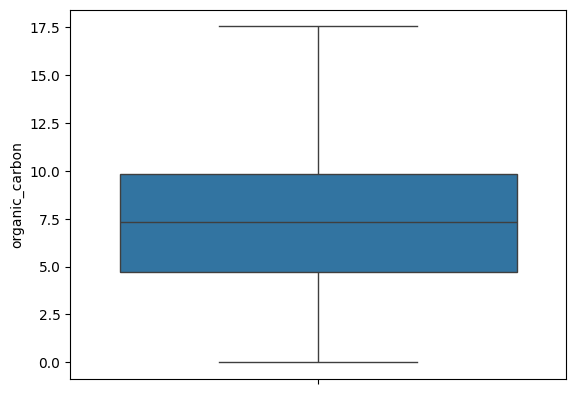

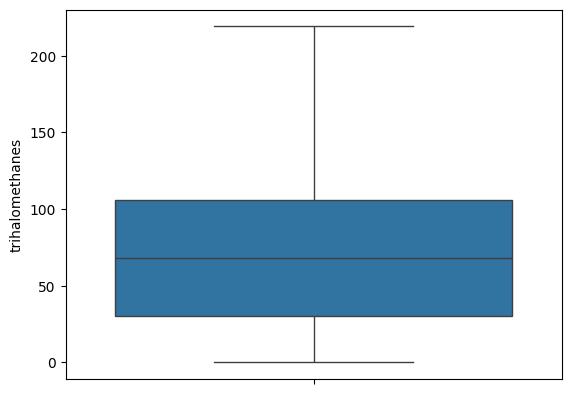

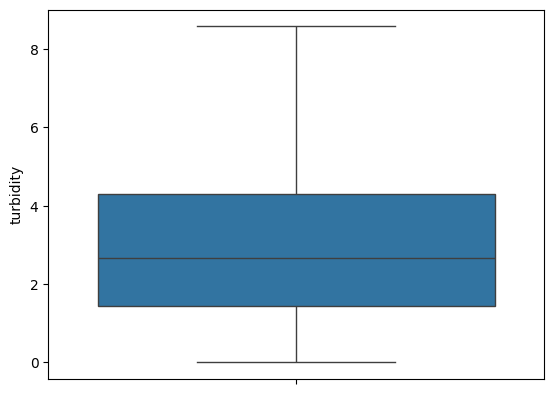

In [22]:
# checking outlier for whole Dataset
for i in df.columns:
  sns.boxplot(data=df,y=df[i])
  plt.show()

# Conclusion (Outlier Handling)

Through this process, I learned the concepts of `capping` and `winsorization`, including when and how each method should be applied for effective outlier handling.